## Data Preprocessing

In [ ]:
X=Data.drop('target',axis=1)
X=X.drop('id',axis=1)
Y=Data.target
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, stratify=Y,random_state=60)
X_train, X_cv, y_train,y_cv = train_test_split(X_train, y_train, test_size=0.15,stratify=y_train,random_state=60)

In [ ]:
redundant=[]
print("These features have more than or equal to 95% of their datapoints as 0 which does not contribute much to training :")
for i in X_train.columns:
  if (X_train[i]==0).sum()>38760 and i!='target':
    X_train.drop(i,inplace=True,axis=1)
    redundant.append(i)
    print(i)

These features have more than or equal to 95% of their datapoints as 0 which does not contribute much to training :
sensor7_histogram_bin0
sensor7_histogram_bin1
sensor19_measure
sensor21_measure
sensor24_histogram_bin0
sensor24_histogram_bin1
sensor24_histogram_bin2
sensor24_histogram_bin3
sensor24_histogram_bin4
sensor24_histogram_bin9
sensor25_histogram_bin9
sensor64_histogram_bin0
sensor100_measure
sensor106_measure


###Removing features with less than 80 percent variability

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=80)
var_thres.fit( X_train)
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]] #Checking every columns if it is greater than the given threshold or not and storing them in constant_columns

for column in constant_columns:
  if column!='target':
    X_train.drop(column,axis=1,inplace=True)#dropping the constant columns
    redundant.append(column)
    print(column)

sensor2_measure
sensor18_measure
sensor54_measure
sensor58_measure
sensor107_measure


In [ ]:
Columns_check=X_train.columns.copy()
X_train = X_train.loc[:,X_train.isnull().mean() < .75] #remove columns with more than 75% of their features as NULL
redundant.extend(list((set(Columns_check)-set(X_train.columns))))
#X_train.drop_duplicates(keep='first',inplace=True) # drop duplicate rows
print("The columns which have been removed are",(set(Columns_check)-set(X_train.columns)))

The columns which have been removed are {'sensor42_measure', 'sensor41_measure', 'sensor40_measure', 'sensor43_measure', 'sensor68_measure'}


In [ ]:
def impute_nan(Median_data,variable,median):
    Median_data[variable+"_median"]=Median_data[variable].fillna(median)

In [ ]:
#from tqdm import tqdm
med=dict()
Median_data=X_train.copy()    #create a copy the original data
median_name=[]
variable_name=[]
for i in tqdm(Median_data.columns):
  median_name.append(i+"_median")
  variable_name.append(i)                     #trying to impute the data with median as the data is highly skewed
  median=Median_data[i].median()
  impute_nan(Median_data,i,median)
  med[i]=median
zip_median=zip(median_name,variable_name)


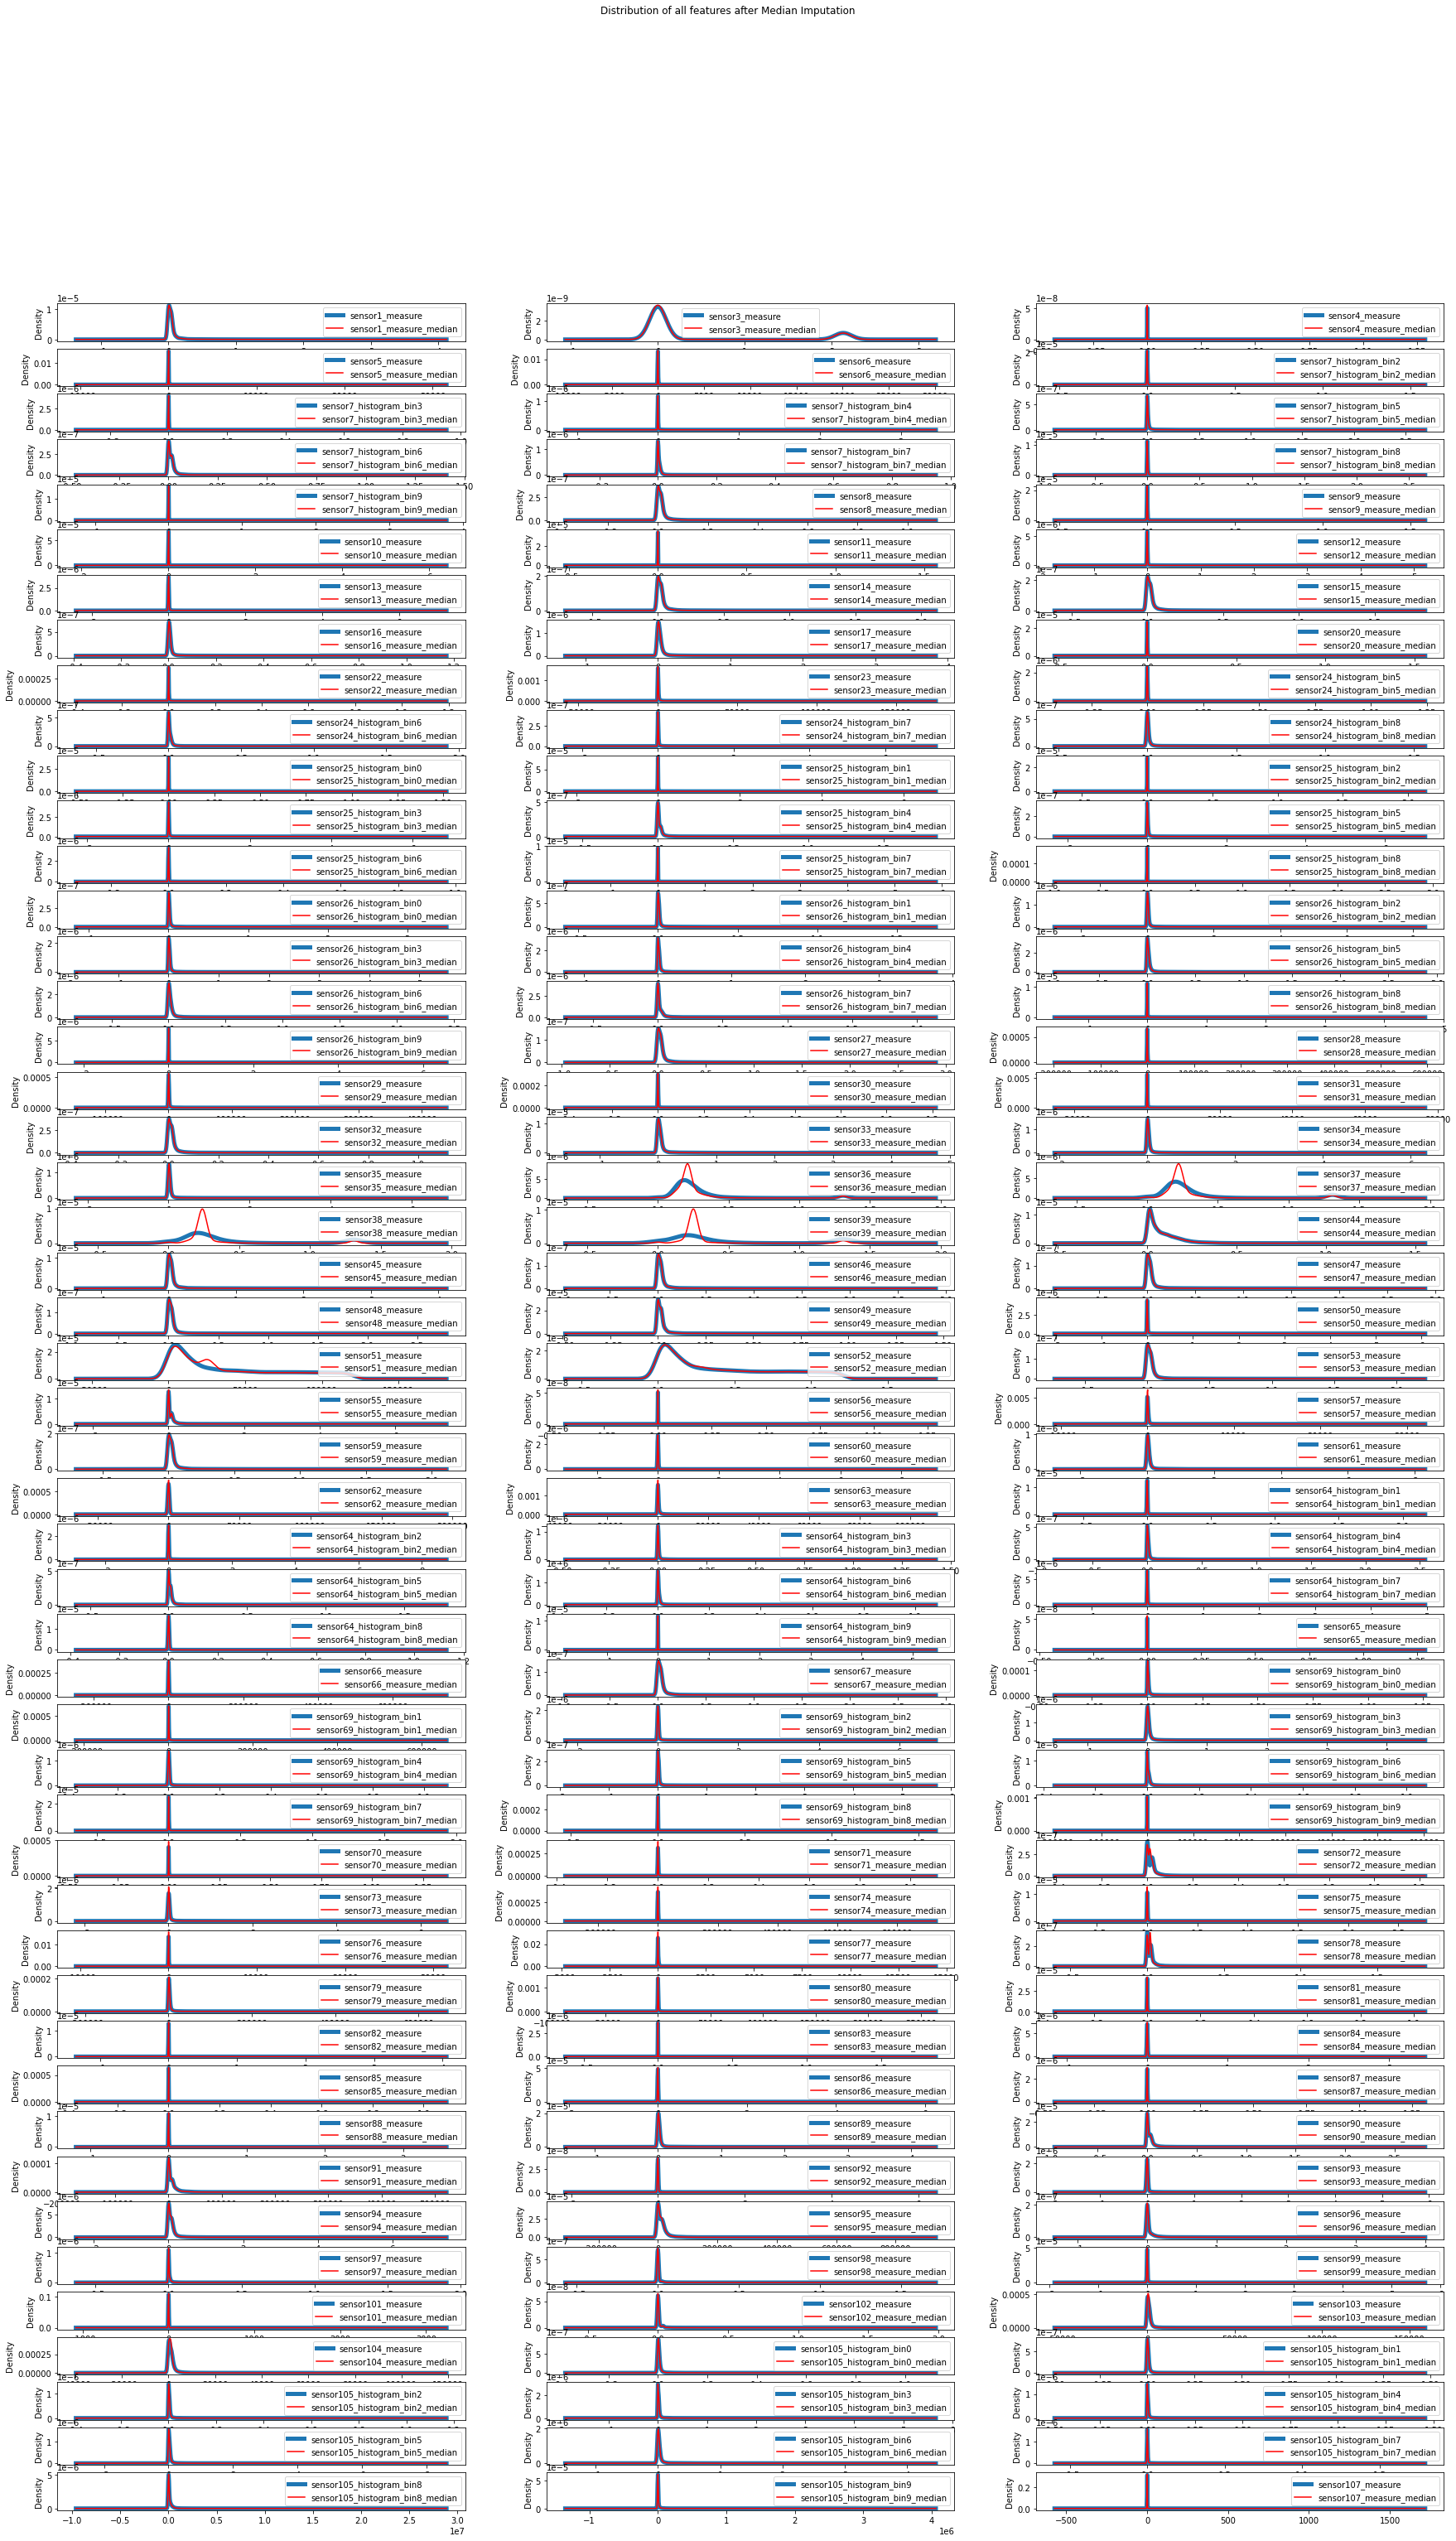

In [ ]:
fig=plt.figure(figsize=(30,50))
count=0
for i,j in tqdm(zip_median):
  ax=fig.add_subplot(50,3,count+1)
  try:

    Median_data[j].plot(kind='kde',ax=ax,linewidth=5.0)
    Median_data[i].plot(kind='kde', ax=ax, color='red')
    lines,labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')
    count=count+1
  except:
    continue
plt.suptitle("Distribution of all features after Median Imputation")
plt.show()

In [ ]:
for i,j in zip_median:
  try:
    if ((Median_data[j].std()-Median_data[i].std())/Median_data[j].std())>0.10:
      print("The feature {} has {}% change from its original standard deviation after median imputation".format(j,((Median_data[j].std()-Median_data[i].std())/Median_data[j].std())*100))
  except:
    pass


The feature sensor4_measure has 13.196750846632682% change from its original standard deviation after median imputation
The feature sensor36_measure has 20.40532405221938% change from its original standard deviation after median imputation
The feature sensor37_measure has 24.571198545156083% change from its original standard deviation after median imputation
The feature sensor38_measure has 38.765116316732026% change from its original standard deviation after median imputation
The feature sensor39_measure has 44.55731474111716% change from its original standard deviation after median imputation
The feature sensor56_measure has 13.19675155774123% change from its original standard deviation after median imputation
The feature sensor57_measure has 13.033623567186009% change from its original standard deviation after median imputation
The feature sensor65_measure has 13.196750833042584% change from its original standard deviation after median imputation
The feature sensor70_measure has 12.



*   We can observe that median imputation is fine for most of the features except few of them
*   There is a significant change in the standard deviation of few features after median imputation as shown above .

* For features with less than 10% chance in their standard deviation we shall impute the missing values with median. For the remaining features we shall try another approach.





In [ ]:
features=['sensor4_measure','sensor36_measure','sensor37_measure','sensor38_measure','sensor39_measure','sensor56_measure',
          'sensor57_measure','sensor65_measure',
          'sensor70_measure','sensor71_measure','sensor72_measure','sensor73_measure','sensor74_measure',
          'sensor75_measure','sensor76_measure','sensor77_measure','sensor78_measure']

Random_impute=X_train[features].copy()


In [ ]:
imputer = mdi.RandomSampleImputer(random_state=42)
imputer.fit(Random_impute)

# transform the data
train_t = imputer.transform(Random_impute)

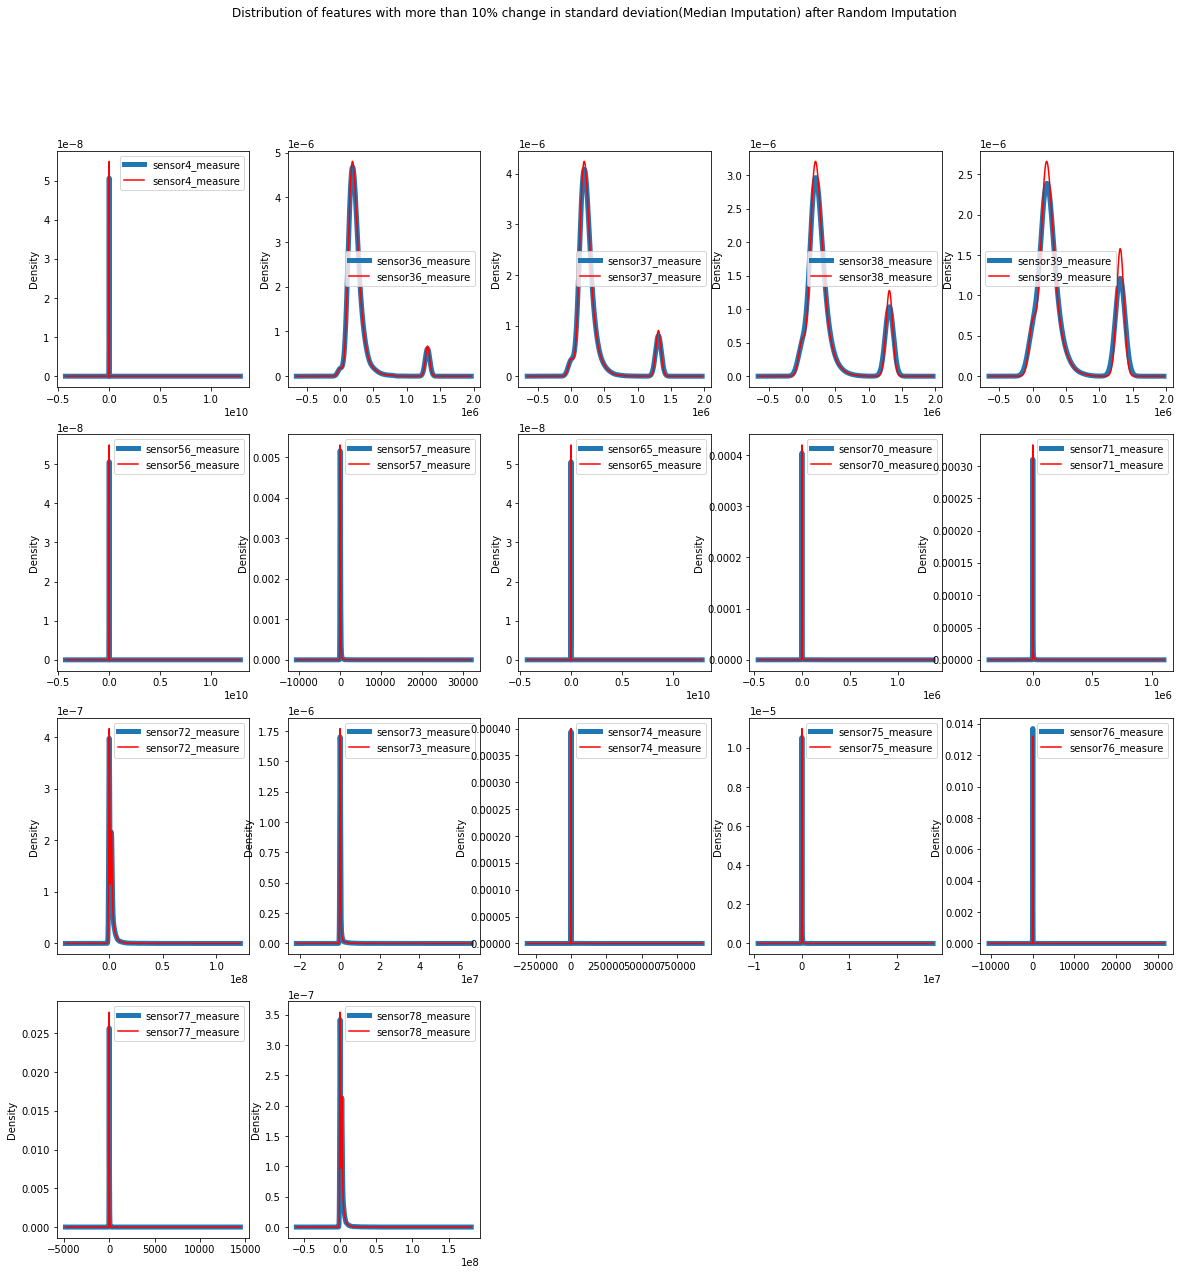

In [ ]:
fig=plt.figure(figsize=(20,20))
count=0
for j in tqdm(train_t.columns):
  ax=fig.add_subplot(4,5,count+1)
  count=count+1
  X_train[j].plot(kind='kde',ax=ax,linewidth=5.0)
  train_t[j].plot(kind='kde', ax=ax, color='red')
  lines,labels = ax.get_legend_handles_labels()
  ax.legend(lines, labels, loc='best')
plt.suptitle("Distribution of features with more than 10% change in standard deviation(Median Imputation) after Random Imputation ")
plt.show()

In [ ]:
for j in train_t.columns:
  if ((X_train[j].std()-train_t[j].std())/X_train[j].std())>0.10:
    print("The feature {} has {}% change from its original standard deviation after Random imputation".format(j,((X_train[j].std()-train_t[j].std())/X_train[j].std())*100))

The feature sensor4_measure has 13.196751514777342% change from its original standard deviation after Random imputation
The feature sensor56_measure has 13.196751639941503% change from its original standard deviation after Random imputation
The feature sensor65_measure has 13.196751627140465% change from its original standard deviation after Random imputation




*   It is evident that there are three features whose percentage change in variance is greater than 10% .
*   We shall fit the random features imputer on the remaining features excluding those 3 features



In [ ]:
Random_impute=X_train[features].copy()
Random_impute.drop('sensor4_measure',axis=1,inplace=True)
Random_impute.drop('sensor56_measure',axis=1,inplace=True)
Random_impute.drop('sensor65_measure',axis=1,inplace=True)
imputer = mdi.RandomSampleImputer(random_state=42)
imputer.fit(Random_impute)

# transform the data
train_t = imputer.transform(Random_impute)



*   After experimenting with random imputation we can observe that the number of features with standard deviation less than 10% has decreased .
*   There are 3 more features with standard deviation greater than 105 after random imputation . We shall try other approaches for this feature



In [ ]:
Standarad_dev_data=X_train.copy()
std_features=['sensor4_measure','sensor56_measure','sensor65_measure']
Standarad_dev_name=[]
variable_name=[]
standard=dict()
def impute_nan(Standarad_dev_data,variable,dev):
    Standarad_dev_data[variable+"_std"]=Standarad_dev_data[variable].fillna(dev)
for i in tqdm(Standarad_dev_data.columns):
  if i in std_features:
    Standarad_dev_name.append(i+"_std")
    variable_name.append(i)
    dev=(Standarad_dev_data[i].std())
    standard[i]=dev
    impute_nan(Standarad_dev_data,i,dev)
zip_std=zip(Standarad_dev_name,variable_name)

In [ ]:
for i,j in zip_std:
  if ((Standarad_dev_data[j].std()-Standarad_dev_data[i].std())/Standarad_dev_data[j].std())>0.10:
    print("The feature {} has {}% change from its original standard deviation after Standard Deviation imputation".format(j,((Standarad_dev_data[j].std()-Standarad_dev_data[i].std())/Standarad_dev_data[j].std())*100))
  else:
    print("The feature {} has {}% change from its original standard deviation after Standard Deviation imputation".format(j,((Standarad_dev_data[j].std()-Standarad_dev_data[i].std())/Standarad_dev_data[j].std())*100))

The feature sensor4_measure has 3.195538764386526% change from its original standard deviation after Standard Deviation imputation
The feature sensor56_measure has 3.1953793518211504% change from its original standard deviation after Standard Deviation imputation
The feature sensor65_measure has 3.19549490026056% change from its original standard deviation after Standard Deviation imputation


3it [00:07,  2.42s/it]


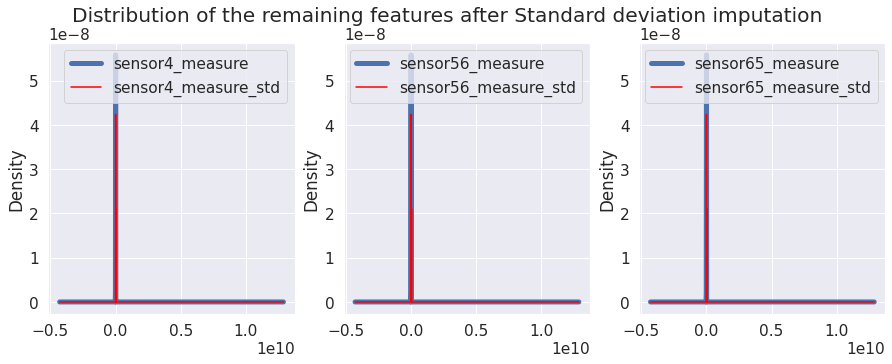

In [ ]:
fig=plt.figure(figsize=(15,5))
count=0
for i,j in tqdm(zip_std):
  ax=fig.add_subplot(1,3,count+1)
  count=count+1
  Standarad_dev_data[j].plot(kind='kde',ax=ax,linewidth=5.0)
  Standarad_dev_data[i].plot(kind='kde', ax=ax, color='red')
  lines,labels = ax.get_legend_handles_labels()
  ax.legend(lines, labels, loc='best')
plt.suptitle("Distribution of the remaining features after Standard deviation imputation  ")
plt.show()

In [ ]:
try:
    dictionary = open('standard_dev.pkl', 'wb')
    pickle.dump(standard,dictionary)
    dictionary.close()

except:
    print("Something went wrong")



* We can observe that imputing the missing values with the standard deviation is a better option as the variance is hardly lost.



## Impute Nan values with Median,Random Sampling and Standard Deviation

In [ ]:
X_train['sensor4_measure']=Standarad_dev_data['sensor4_measure_std']
X_train['sensor56_measure']=Standarad_dev_data['sensor56_measure_std']
X_train['sensor65_measure']=Standarad_dev_data['sensor65_measure_std']
X_train['sensor36_measure']=train_t['sensor36_measure']
X_train['sensor37_measure']=train_t['sensor37_measure']
X_train['sensor38_measure']=train_t['sensor38_measure']
X_train['sensor39_measure']=train_t['sensor39_measure']
X_train['sensor57_measure']=train_t['sensor57_measure']
X_train['sensor70_measure']=train_t['sensor70_measure']
X_train['sensor71_measure']=train_t['sensor71_measure']
X_train['sensor72_measure']=train_t['sensor72_measure']
X_train['sensor73_measure']=train_t['sensor73_measure']
X_train['sensor74_measure']=train_t['sensor74_measure']
X_train['sensor75_measure']=train_t['sensor75_measure']
X_train['sensor76_measure']=train_t['sensor76_measure']
X_train['sensor77_measure']=train_t['sensor77_measure']
X_train['sensor78_measure']=train_t['sensor78_measure']

for i in X_train.columns:
  if i not in features:
    X_train[i]=Median_data[i+"_median"]


In [ ]:
#https://kgptalkie.com/feature-selection-with-filtering-method-constant-quasi-constant-and-duplicate-feature-removal/
def get_correlation(data, threshold):
    corr_col = set()
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])> threshold: #check if the correlation among the two features is greater than the given threshold
                colname = corrmat.columns[i]
                corr_col.add(colname) #add the column to the set
    return corr_col



*   There might be many correlated features in the dataset but dropping all of them will lead to some loss of information which might be crucial towards the models development




In [ ]:
corrdata = X_train.corr().abs().stack()
corrdata = corrdata.sort_values(ascending=False)
corrdata = corrdata[corrdata>0.80] #selecting the pairs with correlation above 80%
corrdata = corrdata[corrdata<1]
corrdata = pd.DataFrame(corrdata).reset_index()
corrdata.columns = ['features1', 'features2', 'corr_value']
corrdata ##getting feature pairs with correlation greater than 80% stored and visualized in a dataframe(corrdata)

,features1,features2,corr_value
0,sensor67_measure,sensor47_measure,1.000000
1,sensor47_measure,sensor67_measure,1.000000
2,sensor67_measure,sensor46_measure,1.000000
3,sensor46_measure,sensor67_measure,1.000000
4,sensor46_measure,sensor47_measure,1.000000
...,...,...,...
711,sensor35_measure,sensor14_measure,0.800637
712,sensor69_histogram_bin4,sensor49_measure,0.800557
713,sensor49_measure,sensor69_histogram_bin4,0.800557
714,sensor69_histogram_bin5,sensor24_histogram_bin7,0.800164




*   There might be duplicate pairs in the dataframe . We shall remove the duplicate pairs from the dataframe



In [ ]:
grouped_feature_list = []
correlated_groups_list = []
for feature in corrdata.features1.unique():
    if feature not in grouped_feature_list: #if the pair does not exist in the list
        correlated_block = corrdata[corrdata.features1 == feature]
        grouped_feature_list = grouped_feature_list + list(correlated_block.features2.unique()) + [feature]
        correlated_groups_list.append(correlated_block) #appending the feature to the list

### Dropping correlated features based on their importance using Random Forest



*   Dropping all of the correlated features might be a bad idea because there will be a loss of lot of information
*   We shall drop the correlated features based on least importance using Random Forest Classifier



In [ ]:
important_features = []
for group in tqdm(correlated_groups_list):
    features = list(group.features1.unique()) + list(group.features2.unique())
    rf = RandomForestClassifier(n_estimators=100, random_state=0)
    rf.fit(X_train[features], y_train)

    importance = pd.concat([pd.Series(features), pd.Series(rf.feature_importances_)], axis = 1) #creating a dataframe using the feature importance
    importance.columns = ['features', 'importance'] #giving the column names
    importance.sort_values(by = 'importance', ascending = False, inplace = True)
    feat = importance.iloc[0]
    important_features.append(feat)

In [ ]:
important_features = pd.DataFrame(important_features)
important_features.reset_index(inplace=True, drop = True)
important_features

,features,importance
0,sensor35_measure,0.100071
1,sensor13_measure,0.503388
2,sensor94_measure,0.509606
3,sensor59_measure,0.126638
4,sensor53_measure,0.115891
5,sensor78_measure,0.352731
6,sensor90_measure,0.513188
7,sensor103_measure,0.509986
8,sensor105_histogram_bin0,0.360205
9,sensor87_measure,0.513940


In [ ]:
features_to_consider = set(important_features['features'])
features_to_discard = set(get_correlation(X_train,0.80)) - set(features_to_consider) #discarding the features with less importance
features_to_discard = list(features_to_discard)
X_train_grouped_uncorr = X_train.drop(labels = features_to_discard, axis = 1)
X_train=X_train_grouped_uncorr

In [ ]:
for i in redundant:
  X_test.drop(i,axis=1,inplace=True)
  X_cv.drop(i,axis=1,inplace=True)    #dropping the redundant features

In [ ]:
features=['sensor4_measure','sensor36_measure','sensor37_measure','sensor38_measure','sensor39_measure','sensor56_measure',
          'sensor57_measure','sensor65_measure',
          'sensor70_measure','sensor71_measure','sensor72_measure','sensor73_measure','sensor74_measure',
          'sensor75_measure','sensor76_measure','sensor77_measure','sensor78_measure'] #the features which need random imputation and standard deviation imputation for their missing values


for i in X_cv.columns:
  if i not in features:
    X_cv[i].fillna(med[i],inplace=True) #imputing X_cv with the median values
  if i=='sensor4_measure' or i=='sensor56_measure' or i=='sensor65_measure':
    X_cv[i].fillna(standard[i],inplace=True) #imputing X_cv with the standard deviation values

'''
I have used to different loops for the cv and test data because I do not want any sort of data leakage or exposure to the cv data'''


for i in X_test.columns:
  if i not in features:
    X_test[i].fillna(med[i],inplace=True) #imputing X_test with the median values
  if i=='sensor4_measure' or i=='sensor56_measure' or i=='sensor65_measure':
    X_test[i].fillna(standard[i],inplace=True) #imputing X_test with the standard deviation values

In [ ]:
Random_impute=X_test[features].copy()
Random_impute.drop('sensor4_measure',axis=1,inplace=True)
Random_impute.drop('sensor56_measure',axis=1,inplace=True)
Random_impute.drop('sensor65_measure',axis=1,inplace=True)
Random_impute_cv=X_cv[features].copy()
Random_impute_cv.drop('sensor4_measure',axis=1,inplace=True)
Random_impute_cv.drop('sensor56_measure',axis=1,inplace=True)
Random_impute_cv.drop('sensor65_measure',axis=1,inplace=True)

test_t = imputer.transform(Random_impute)
cv_t = imputer.transform(Random_impute_cv)


#random imputation for cv data
X_cv['sensor36_measure']=cv_t['sensor36_measure']
X_cv['sensor37_measure']=cv_t['sensor37_measure']
X_cv['sensor38_measure']=cv_t['sensor38_measure']
X_cv['sensor39_measure']=cv_t['sensor39_measure']
X_cv['sensor57_measure']=cv_t['sensor57_measure']
X_cv['sensor70_measure']=cv_t['sensor70_measure']
X_cv['sensor71_measure']=cv_t['sensor71_measure']
X_cv['sensor72_measure']=cv_t['sensor72_measure']
X_cv['sensor73_measure']=cv_t['sensor73_measure']
X_cv['sensor74_measure']=cv_t['sensor74_measure']
X_cv['sensor75_measure']=cv_t['sensor75_measure']
X_cv['sensor76_measure']=cv_t['sensor76_measure']
X_cv['sensor77_measure']=cv_t['sensor77_measure']
X_cv['sensor78_measure']=cv_t['sensor78_measure']



#random imputation for test data
X_test['sensor36_measure']=test_t['sensor36_measure']
X_test['sensor37_measure']=test_t['sensor37_measure']
X_test['sensor38_measure']=test_t['sensor38_measure']
X_test['sensor39_measure']=test_t['sensor39_measure']
X_test['sensor57_measure']=test_t['sensor57_measure']
X_test['sensor70_measure']=test_t['sensor70_measure']
X_test['sensor71_measure']=test_t['sensor71_measure']
X_test['sensor72_measure']=test_t['sensor72_measure']
X_test['sensor73_measure']=test_t['sensor73_measure']
X_test['sensor74_measure']=test_t['sensor74_measure']
X_test['sensor75_measure']=test_t['sensor75_measure']
X_test['sensor76_measure']=test_t['sensor76_measure']
X_test['sensor77_measure']=test_t['sensor77_measure']
X_test['sensor78_measure']=test_t['sensor78_measure']

In [ ]:
for i in X_test.columns:
  if i not in X_train.columns:
    X_test.drop(i,inplace=True,axis=1)          #Finally discarding the columns which are not present in the train dataset


for i in X_cv.columns:
  if i not in X_train.columns:
    X_cv.drop(i,inplace=True,axis=1)
